In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

In [13]:
data = pd.read_csv(r'C:\Users\Zehra\Desktop\ML\data\cars_price.csv')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

In [34]:
def value_count_each_value(cols_list):
    for col in cols_list:
        print(data[col].value_counts())
        print('/n')

In [ ]:
value_count_each_value(data.columns)

In [42]:
should_be_numerics = ['normalized-losses', 'bore','stroke', 'horsepower',
                    'peak-rpm','price'  ]

In [43]:
for col in should_be_numerics:
    data[col]= pd.to_numeric(data[col], errors='coerce')

### Now we have a total of 16 numeric columns

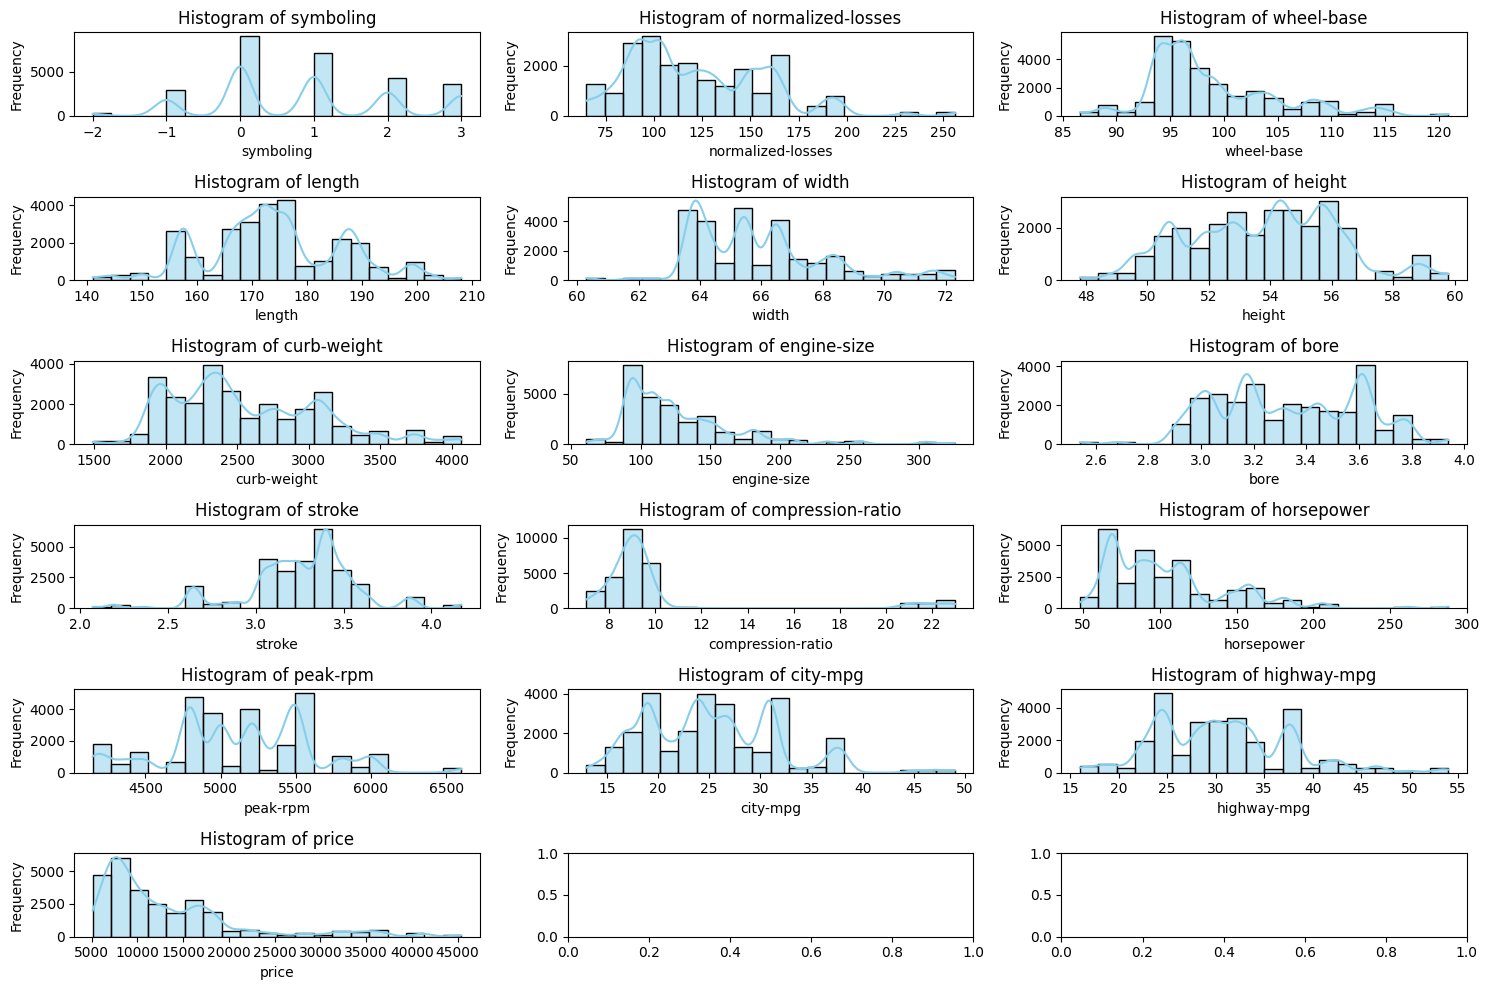

In [46]:
numeric_columns = data.select_dtypes(include=['float']).columns
num_cols = len(numeric_columns)

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 10))
#  axes direct figs where to be formed
# figs, axes = 3 x 3 shape

axes = axes.flatten()
# axes becomes 1 x 9

for ax, column in zip(axes, numeric_columns):
    # axes = 9, columns = 6
    # this loops run a total of 9 times
    # there are three empty axes

    sns.histplot(data[column], ax=ax, kde=True, bins=20, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots if any
# for i in range(len(numeric_columns), len(axes)):
#     fig.delaxes(axes[i])

plt.tight_layout()
plt.show()